<a href="https://colab.research.google.com/github/Flaviofrc97/DASCIENSE-MACHINE-LEARNING/blob/main/Diabetes_Predction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **0. IMPORTS**

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
#Fazendo os mesmos calculos acima, porém com sklearn
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# **1. DESCRICAO DOS DADOS**

Number of times pregnant

---


Plasma glucose concentration a 2 hours in an oral glucose tolerance test

---


Diastolic blood pressure (mm Hg)

---


Triceps skin fold thickness (mm)

---


2-Hour serum insulin (mu U/ml)

---


Body mass index (weight in kg/(height in m)^2)

---


Diabetes pedigree function

---


Age (years)

---


target (0 or 1)

In [86]:
df = pd.read_csv('/content/drive/MyDrive/Diabetes/diabetes.csv')

In [87]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [88]:
df.shape

(768, 9)

In [89]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [90]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [91]:
rename_cols = ['gravidezes', 'Glicose', 'pressao_diastolica', 'espessura_pele', 'Insulina', 'IMC', 'Propabilidade_diabetes', 'idade', 'target']

In [92]:
df.columns = map(str.lower, rename_cols)

In [93]:
df.head()

,gravidezes,glicose,pressao_diastolica,espessura_pele,insulina,imc,propabilidade_diabetes,idade,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 2. **ANÁLISE EXPLORATÓRIA**

In [94]:
df1 = df.copy()

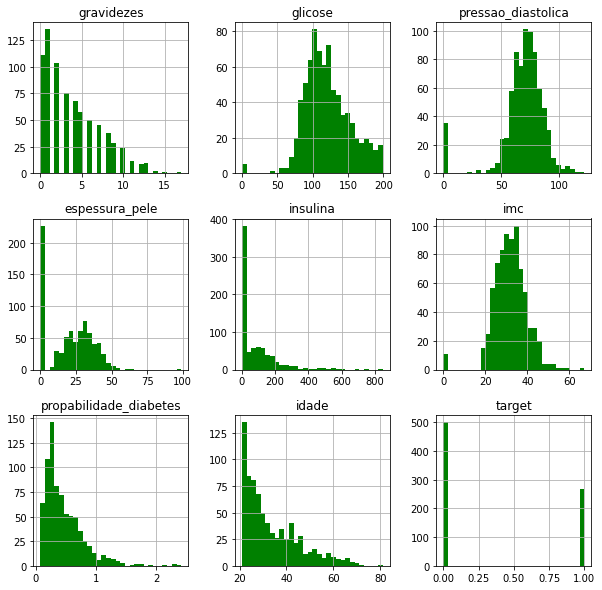

In [95]:
df1.hist(bins=30, figsize=(10,10), color= "g");

In [96]:
correlations = df1.corr();


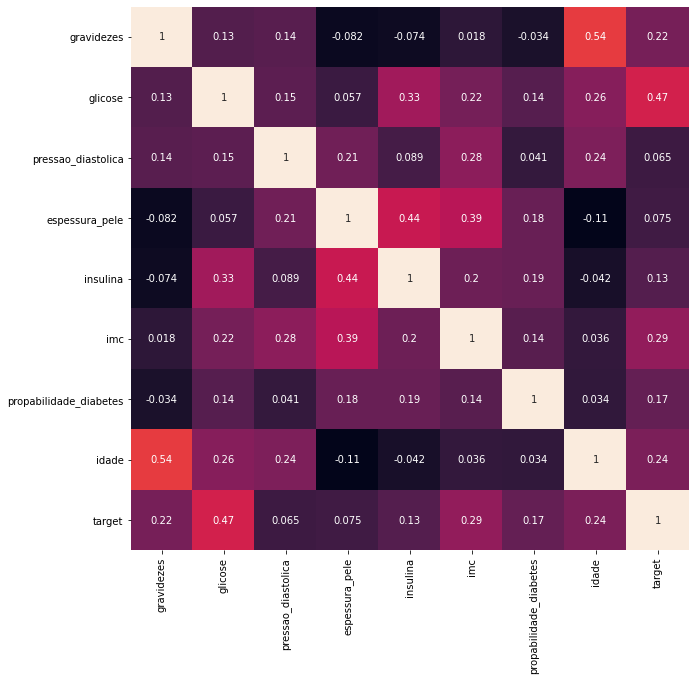

In [97]:
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlations, annot=True, cbar=False);

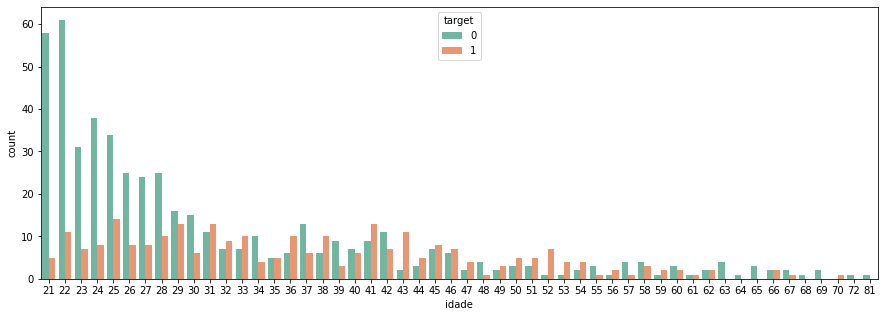

In [98]:
plt.figure(figsize=[15,5])
sns.countplot(x= 'idade', hue= 'target', palette="Set2", data= df1);

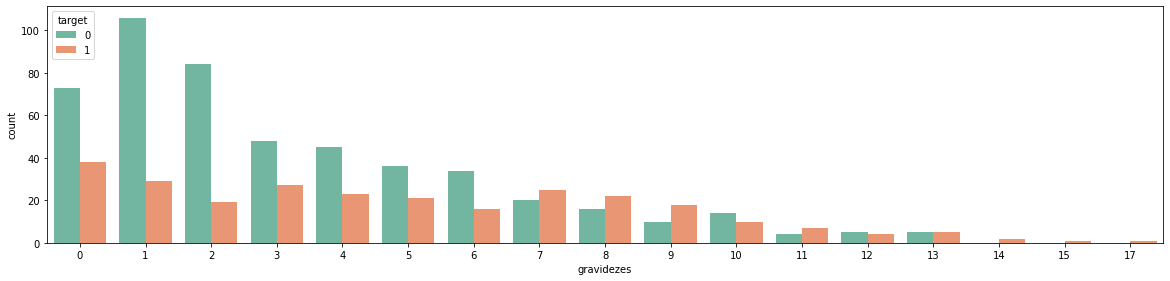

In [99]:
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x = 'gravidezes', hue= 'target', palette="Set2", data= df1)

In [100]:
df1.sample()

,gravidezes,glicose,pressao_diastolica,espessura_pele,insulina,imc,propabilidade_diabetes,idade,target
496,5,110,68,0,0,26.0,0.292,30,0


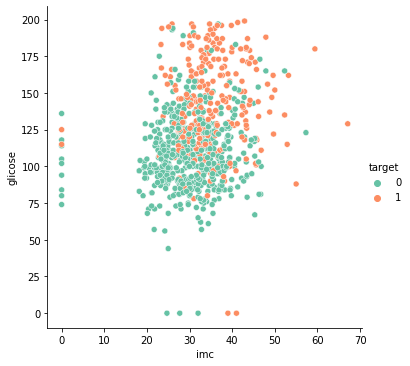

In [101]:
sns.relplot(x="imc", y="glicose", hue="target", palette="Set2", data=df1);

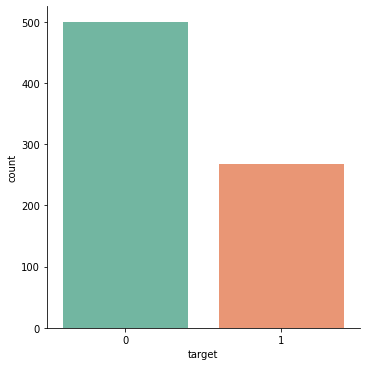

In [102]:
sns.catplot(x="target", kind="count", palette="Set2", data=df1);

# **3. Pré-processamento**

In [103]:
df2 = df1.copy()

In [104]:
df2.head()

,gravidezes,glicose,pressao_diastolica,espessura_pele,insulina,imc,propabilidade_diabetes,idade,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [105]:
y = df2['target']
x = df2.iloc[:,0:7]

In [106]:
x.head()

,gravidezes,glicose,pressao_diastolica,espessura_pele,insulina,imc,propabilidade_diabetes
0,6,148,72,35,0,33.6,0.627
1,1,85,66,29,0,26.6,0.351
2,8,183,64,0,0,23.3,0.672
3,1,89,66,23,94,28.1,0.167
4,0,137,40,35,168,43.1,2.288


In [107]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: target, dtype: int64

In [108]:
#Colocando os valores na mesma escala.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [109]:
x

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.        , 0.50074516,
        0.23441503],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.        , 0.39642325,
        0.11656704],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.        , 0.34724292,
        0.25362938],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.13238771, 0.390462  ,
        0.07130658],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.        , 0.4485842 ,
        0.11571307],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.        , 0.45305514,
        0.10119556]])

In [110]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

# **4. REGRESSÃO LINEAR**

In [111]:
from sklearn.linear_model import LogisticRegression

In [112]:
lr = LogisticRegression()

In [113]:
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [114]:
y_pred = lr.predict(x_test)

In [115]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.78125


In [116]:
print(classification_report(y_test, y_pred)) #Visualizando todas as metricas juntas

              precision    recall  f1-score   support

           0       0.80      0.92      0.85       133
           1       0.72      0.47      0.57        59

    accuracy                           0.78       192
   macro avg       0.76      0.70      0.71       192
weighted avg       0.77      0.78      0.77       192



# **5. Random forest**

In [117]:
from sklearn.ensemble import RandomForestClassifier

In [118]:
rf = RandomForestClassifier()

In [119]:
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [120]:
y_rfpred = rf.predict(x_test)

In [121]:
print("Accuracy:",metrics.accuracy_score(y_test, y_rfpred))

Accuracy: 0.7604166666666666


In [122]:
print(classification_report(y_test, y_rfpred)) #Visualiza todas as metricas juntas

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       133
           1       0.64      0.51      0.57        59

    accuracy                           0.76       192
   macro avg       0.72      0.69      0.70       192
weighted avg       0.75      0.76      0.75       192



# **6. REDE NEURAL**

In [123]:
import tensorflow as tf

In [124]:
x.shape

(768, 7)

Definindo o número de neurônios: 

**(7 + 1) / 2**

fonte: https://iaexpert.academy/2020/05/04/quantas-camadas-escondidas-e-quantos-neuronios-incluir-numa-rede-neural-artificial/

In [136]:
rede_neural = tf.keras.models.Sequential()
rede_neural.add(tf.keras.layers.Dense(units = 4, activation ='relu', input_shape=(7,))) #cama de entrada
rede_neural.add(tf.keras.layers.Dense(units=4, activation='relu')) #camada oculta
rede_neural.add(tf.keras.layers.Dense(units=4, activation='relu')) #camada Oculda
rede_neural.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) #camada de saida

In [137]:
rede_neural.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 4)                 32        
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 5         
Total params: 77
Trainable params: 77
Non-trainable params: 0
_________________________________________________________________


In [138]:
#Compilando a rede neural
rede_neural.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'] )

In [140]:
#Treinando a rede (ajustando os pesos)
rede_neural.fit(x_train, y_train, epochs=200); #rodo 200 vezes a atualizar os valores dos pesos.

Epoch 1/200
18/18 [==============================] - 0s 1ms/step - loss: 0.4613 - accuracy: 0.7743
Epoch 2/200
18/18 [==============================] - 0s 1ms/step - loss: 0.4611 - accuracy: 0.7760
Epoch 3/200
18/18 [==============================] - 0s 1ms/step - loss: 0.4615 - accuracy: 0.7778
Epoch 4/200
18/18 [==============================] - 0s 1ms/step - loss: 0.4615 - accuracy: 0.7743
Epoch 5/200
18/18 [==============================] - 0s 1ms/step - loss: 0.4615 - accuracy: 0.7760
Epoch 6/200
18/18 [==============================] - 0s 1ms/step - loss: 0.4610 - accuracy: 0.7760
Epoch 7/200
18/18 [==============================] - 0s 1ms/step - loss: 0.4618 - accuracy: 0.7726
Epoch 8/200
18/18 [==============================] - 0s 1ms/step - loss: 0.4613 - accuracy: 0.7760
Epoch 9/200
18/18 [==============================] - 0s 1ms/step - loss: 0.4615 - accuracy: 0.7743
Epoch 10/200
18/18 [==============================] - 0s 1ms/step - loss: 0.4610 - accuracy: 0.7778
Epoch 11/

In [141]:
y_pred_neural = rede_neural.predict(x_test)
y_pred_neural

array([[0.12327695],
       [0.85326433],
       [0.44846654],
       [0.3503459 ],
       [0.27972686],
       [0.3988201 ],
       [0.4144789 ],
       [0.06415781],
       [0.17379451],
       [0.84471047],
       [0.13847598],
       [0.86664563],
       [0.8218987 ],
       [0.35338837],
       [0.04980081],
       [0.22550935],
       [0.14632541],
       [0.07732663],
       [0.05529749],
       [0.08628201],
       [0.1798087 ],
       [0.7316835 ],
       [0.04962355],
       [0.1039117 ],
       [0.37730083],
       [0.44402575],
       [0.11470014],
       [0.08234763],
       [0.05847391],
       [0.3836148 ],
       [0.12680724],
       [0.8250288 ],
       [0.15829992],
       [0.13693783],
       [0.16741663],
       [0.15966472],
       [0.38693485],
       [0.5991416 ],
       [0.04580209],
       [0.41078642],
       [0.77948236],
       [0.5017136 ],
       [0.3039093 ],
       [0.04003924],
       [0.03484866],
       [0.3273098 ],
       [0.03996086],
       [0.057

In [142]:
y_pred_neural = (y_pred_neural >= 0.5) #Convertendo para True ou False
y_pred_neural

array([[False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [

In [143]:
print(classification_report(y_test, y_pred_neural)) #Visualiza todas as metricas juntas

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       133
           1       0.65      0.53      0.58        59

    accuracy                           0.77       192
   macro avg       0.73      0.70      0.71       192
weighted avg       0.76      0.77      0.76       192

